<a href="https://colab.research.google.com/github/tasosnikitakis/Machine-and-Deep-Learning/blob/main/Makemore-pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
words = open("names.txt", "r").read().splitlines()

We upload the dataset which is a names.text file that simply has 32K names. We open the text file, read it and then using splitlines each word is saved in the words list

In [2]:
words[:10]

['ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily']

In [3]:
len(words)

32032

In [4]:
min(len(w) for w in words)

0

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for word in words:
  characters = ["<S>"] + list(word) + ["<E>"]
  for ch1, ch2 in zip(characters, characters[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1


Initialy we define an empty dictionary b and then we loop through each word in the words list. For each name (word) we create a list of its characters also adding a special character that signifies the begining of the word (s) and also a special character that defines the end of each word (e). Then we loop throug each pair of characters (ch1 and ch2) in the ziped list of characters that is formed by the first character in the list and the next character and we create the bigram. We then add each bigram in a dictionary with the specific bigram as a key and the times that each bigram was found as its value pair. So we have all the bigrams of the list of names and how many times each occured.

In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6638),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2589),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2479),
 (('i', 'a'), 2444),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1530),
 (('j', 'a'), 1473),
 (

In [8]:
import torch

In [10]:
N = torch.zeros((28,28), dtype = torch.int32)

In [18]:
chars = sorted(set("".join(words)))
stoi = {s:i for i, s in enumerate(chars)}
stoi["<S>"] = 26
stoi["<E>"] = 27

In [19]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [20]:

for word in words:
  characters = ["<S>"] + list(word) + ["<E>"]
  for ch1, ch2 in zip(characters, characters[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [23]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

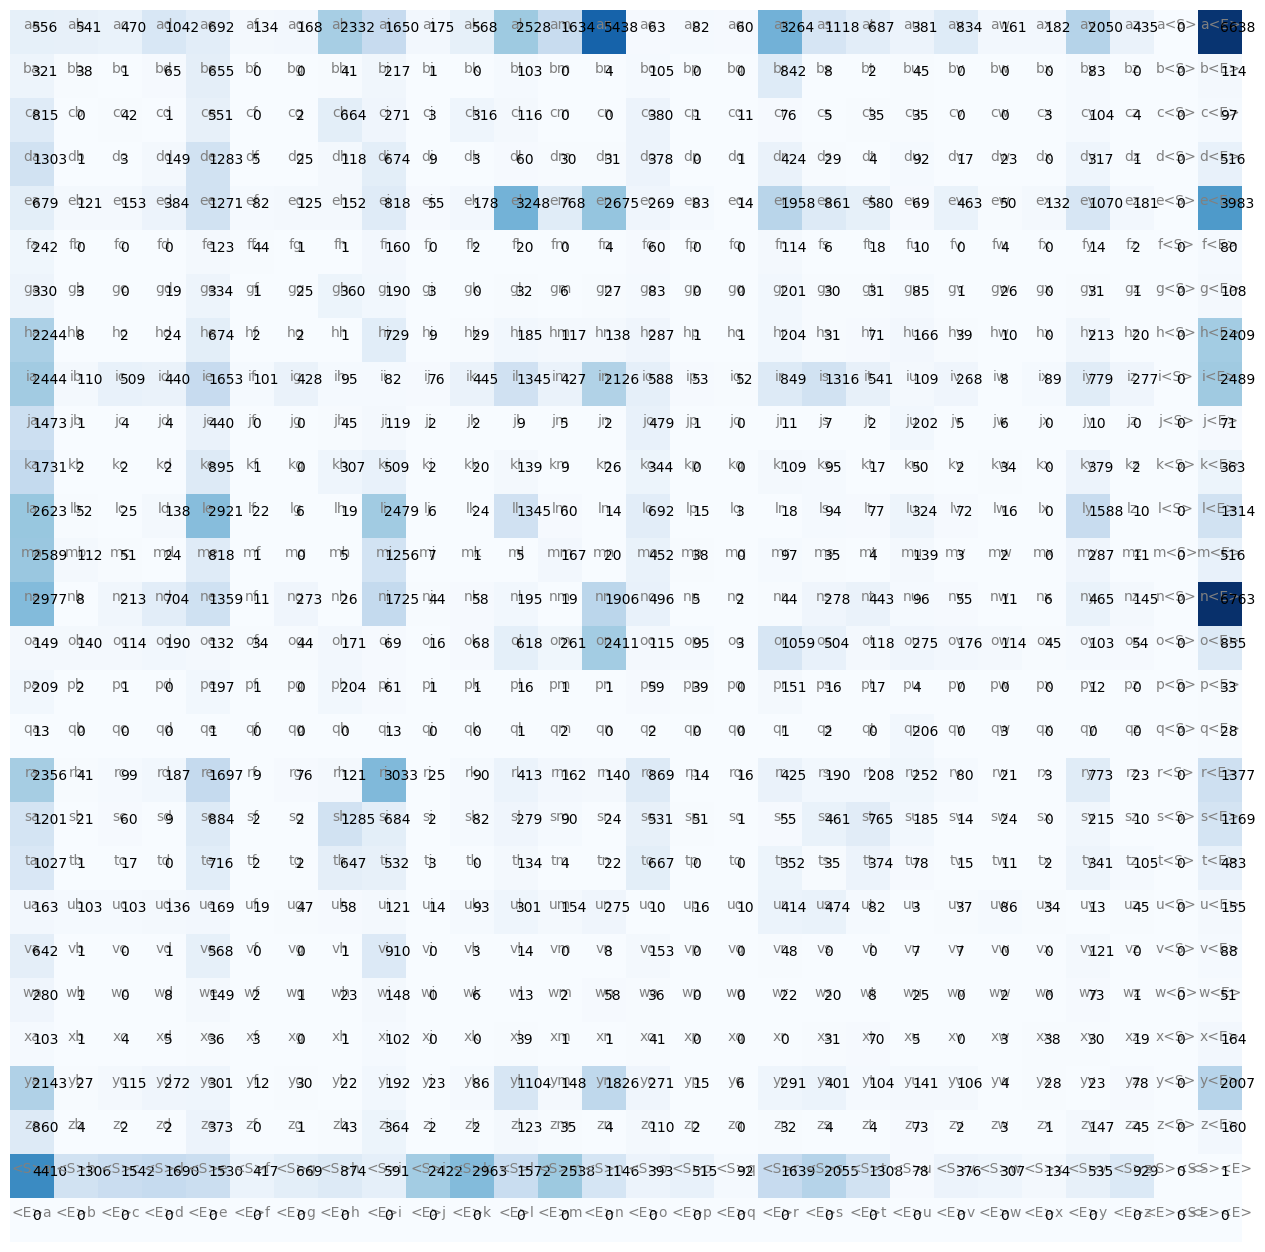

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (16,16))
plt.imshow(N, cmap="Blues")
for i in range(28):
  for j in range(28):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i, j].item())
plt.axis("off");